# 0. Import Dataset

In [18]:
!pip install jax==0.4.20 keras==3.0.0 tensorflow==2.16.1 scikit-learn

  Obtaining dependency information for jax==0.4.20 from https://files.pythonhosted.org/packages/cb/a5/017b93c68422e0d4952575a672a7a491d39b35e78380d5989349c48fea53/jax-0.4.20-py3-none-any.whl.metadata
  Obtaining dependency information for keras==3.0.0 from https://files.pythonhosted.org/packages/24/63/bbc83d949e1940d079dcd1cd87e31498bfb71d641c8e33d917ca3f2e51a9/keras-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow==2.16.1 from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for ml-dtypes>=0.2.0 from https://files.pythonhosted.org/packages/f0/36/290745178e5776f7416818abc1334c1b19afb93c7c87fd1bef3cc99f84ca/ml_dtypes-0.4.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Admin\\AppData\\Roaming\\Python\\Python311\\site-packages\\~5py\\defs.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from underthesea import word_tokenize

## 0.1. Load Dataset

In [99]:
tags = pd.read_csv('raw/tags.csv', header=None, names = ['name', 'href'])
tags

,name,href
0,Mỹ,https://vnexpress.net/chu-de/my-712
1,Donald Trump,https://vnexpress.net/chu-de/donald-trump-1023
2,Israel,https://vnexpress.net/chu-de/israel-2396
3,Hamas,https://vnexpress.net/chu-de/hamas-6805
4,Palestine,https://vnexpress.net/chu-de/palestine-6820
...,...,...
2128,Thần Châu,https://vnexpress.net/tag/than-chau-167616
2129,MAVEN,https://vnexpress.net/tag/maven-585324
2130,tàu Boeing,https://vnexpress.net/tag/tau-boeing-1505210
2131,núi lửa cá mập,https://vnexpress.net/tag/nui-lua-ca-map-1504775


In [100]:
df = pd.read_csv('raw/news.csv', names=['content', 'tags']).dropna()
df.head(20)

,content,tags
0,"""Đây là thời điểm quyết định, có thể là tốt nh...","Mỹ, Israel, Hamas, Palestine, Dải Gaza"
1,Phạm vi thử nghiệm từ đánh giá độ kiên cố của ...,"Mỹ, NASA, máy bay siêu thanh, X-59"
2,\r\n\r\n\r\nHàng trăm người biểu tình gồm các ...,"Mỹ, Donald Trump, Chicago, Kamala Harris, Joe ..."
3,Natalie Garcia - một sinh viên 23 tuổi mới tốt...,"CPI, lạm phát, Mỹ, kinh tế Mỹ, giá nhà ..."
4,"""Giống như một tổ ong khổng lồ"", John Case, mộ...","Mỹ, Amazon, Drone, Drone giao hàng, Amazon Pri..."
5,Cuộc tập trận của Mỹ và Hàn Quốc có tên Lá chắ...,"Mỹ, Triều Tiên, Hàn Quốc"
6,Đang lái xe cùng một người bạn ở thành phố Phi...,"Mỹ, hẹn hò, người yêu, biển quảng cáo"
7,"Hiện tại, Djokovic và Nadal cùng có tổng 596 t...","Mỹ, Novak Djokovic, Rafael Nadal, Alexander Zv..."
8,"Hôm 8/8, Boeing bổ nhiệm Kelly Ortberg làm CEO...","Mỹ, Boeing, Airbus, sản xuất máy bay, kinh tế Mỹ"
9,"""Tiêm kích F/A-18 của liên quân Mỹ đã tiếp cận...","Mỹ, Nga, Syria"


## 0.2. Preprocessing

In [109]:
df2 = df.copy()

In [113]:
df2['tags'].replace(['Tổng thống Mỹ Trump'], 'Donald Trump')

0              Mỹ
1          Israel
2       Palestine
3              Mỹ
4            NASA
          ...    
2763         NASA
2764         NASA
2765         NASA
2766           Mỹ
2767         NASA
Name: tags, Length: 2768, dtype: object

### 0.2.1. Extract data

In [118]:
noise = ['Hamas', 'Dải Gaza', 'Palestine']
news_list = []
for i in df.to_numpy():
    news = i[0]
    for tag in i[1].split(', '):
        news_list.append([news, tag])
df = pd.DataFrame(news_list, columns = ['content', 'tags'])
df = df[~df['tags'].isin(noise)]
df['tags'] = df['tags'].replace(['Tổng thống Mỹ Trump'], 'Donald Trump')
count_df = df.groupby('tags').count().sort_values(by = 'content',ascending=False)
much_tag = count_df.where(count_df>=200).dropna().index.values
df = df[df['tags'].isin(much_tag)].reset_index(drop=True)
df.head(20)

,content,tags
0,"""Đây là thời điểm quyết định, có thể là tốt nh...",Mỹ
1,"""Đây là thời điểm quyết định, có thể là tốt nh...",Israel
2,Phạm vi thử nghiệm từ đánh giá độ kiên cố của ...,Mỹ
3,Phạm vi thử nghiệm từ đánh giá độ kiên cố của ...,NASA
4,\r\n\r\n\r\nHàng trăm người biểu tình gồm các ...,Mỹ
5,\r\n\r\n\r\nHàng trăm người biểu tình gồm các ...,Donald Trump
6,"""Giống như một tổ ong khổng lồ"", John Case, mộ...",Mỹ
7,Cuộc tập trận của Mỹ và Hàn Quốc có tên Lá chắ...,Mỹ
8,Đang lái xe cùng một người bạn ở thành phố Phi...,Mỹ
9,"Hiện tại, Djokovic và Nadal cùng có tổng 596 t...",Mỹ


In [119]:
tags = tags[tags['name'].isin(much_tag)].reset_index(drop=True)
tags

,name,href
0,Mỹ,https://vnexpress.net/chu-de/my-712
1,Donald Trump,https://vnexpress.net/chu-de/donald-trump-1023
2,Israel,https://vnexpress.net/chu-de/israel-2396
3,NASA,https://vnexpress.net/chu-de/co-quan-hang-khon...


### 0.2.2. Clean data

In [120]:
def remove_punc(li):
    import string
    new_list = []
    punctuations = list(string.punctuation)
    for text in li:
        if text in punctuations:
            continue
        new_list.append(text)
    return new_list

In [121]:
def lower(list: list):
    new_list = []
    for text in list:
        new_list.append(text.lower())
    return new_list

In [122]:
df = df.groupby('content').agg({'tags': lambda x: list(x)}).dropna().reset_index()
df['content'] = df['content'].apply(word_tokenize).apply(remove_punc).apply(lower).dropna()
df.head(10)

,content,tags
0,"[hamas, nhóm, vũ trang, kiểm soát, dải gaza, s...",[Israel]
1,"[hàng, trăm, người, biểu tình, gồm, các, nhà, ...","[Mỹ, Donald Trump]"
2,"[lãnh tụ, tối cao, iran ayatollah, ali khamene...",[Israel]
3,"[mô hình, tàu, vostok, chụp, tại, triển lãm, r...","[Mỹ, NASA]"
4,"[một, quả, rocket, được, phóng, từ, khu, dân c...",[Israel]
5,"[những, đoàn, thường dân, palestine, ngày, 7/4...",[Israel]
6,"[những, đám, khói, đen, bốc, lên, dày đặc, sau...",[Israel]
7,"[đám, cháy, park fire, bùng, lên, hôm, 24/7, g...",[Mỹ]
8,"[bảng hiệu, bệnh viện, al-ahli, ở, miền, trung...",[Israel]
9,"[các, cuộc, tuần hành, diễn, ra, ở, nhiều, thà...",[Israel]


In [123]:
X = [news for news in df['content']]
y = [i for i in df['tags']]
len(X), len(y)

(1919, 1919)

### 0.2.3. transform data

In [124]:
import keras
from keras.layers import TextVectorization
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [125]:
voca = []
for i in X:
    for j in i:
        if j not in voca:
            voca.append(j)
print('Size of vocabulary: ', len(voca))

Size of vocabulary:  27843


In [126]:
X_lists = [' '.join(i) for i in X]

In [128]:
t = TextVectorization(output_mode='int')
t.adapt(X_lists)
X1 = t(X_lists)
X1 = X1.numpy()
X1.shape

(1919, 2587)

In [129]:
len(t.get_vocabulary())

14456

In [130]:
m = MultiLabelBinarizer()
y1 = m.fit_transform(y)
y1.shape

(1919, 4)

### 0.2.4. Train test split

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1, random_state=42, test_size=0.2)

# 1. Feed Forward Neural Network

In [133]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.optimizers import RMSprop
from sklearn.metrics import jaccard_score, accuracy_score, f1_score

In [134]:
VOCAB_SIZE = len(voca)
EMBED_SIZE = X_train.shape[0]

In [243]:
model = models.Sequential()
model.add(layers.Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=X_train.shape[1]))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.1))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(y_train.shape[1], activation='sigmoid'))

In [244]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 2587, 1535)        42739005  
                                                                 
 conv1d_75 (Conv1D)          (None, 2585, 32)          147392    
                                                                 
 conv1d_76 (Conv1D)          (None, 2583, 32)          3104      
                                                                 
 conv1d_77 (Conv1D)          (None, 2581, 32)          3104      
                                                                 
 max_pooling1d_30 (MaxPooli  (None, 1290, 32)          0         
 ng1D)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 1290, 32)          0         
                                                     

In [245]:
def jaccard(y_true, y_pred):
  intersection = tf.reduce_sum(y_true * y_pred, axis=1)
  union = tf.reduce_sum(y_true, axis=1) + tf.reduce_sum(y_pred, axis=1) - intersection
  jaccard = tf.math.divide_no_nan(intersection, union)
  return tf.reduce_mean(jaccard)

In [246]:
checkpoint_filepath = 'weights/CNN.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [247]:
model.compile(optimizer = RMSprop(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', jaccard])

In [248]:
hist = model.fit(X_train, y_train, 
                    validation_split=0.2,
                    epochs=10,
                    batch_size=16,
                    callbacks=[model_checkpoint_callback],
                    verbose=1)

Epoch 1/10
77/77 [==============================] - 46s 583ms/step - loss: 0.4834 - accuracy: 0.5440 - jaccard: 0.3646 - val_loss: 0.3583 - val_accuracy: 0.6938 - val_jaccard: 0.5368
Epoch 2/10
77/77 [==============================] - 44s 575ms/step - loss: 0.3447 - accuracy: 0.6914 - jaccard: 0.5059 - val_loss: 0.3185 - val_accuracy: 0.7134 - val_jaccard: 0.5143
Epoch 3/10
77/77 [==============================] - 43s 551ms/step - loss: 0.2742 - accuracy: 0.7508 - jaccard: 0.5707 - val_loss: 0.2757 - val_accuracy: 0.7231 - val_jaccard: 0.6374
Epoch 4/10
77/77 [==============================] - 42s 549ms/step - loss: 0.1939 - accuracy: 0.8200 - jaccard: 0.6904 - val_loss: 0.2536 - val_accuracy: 0.7622 - val_jaccard: 0.6617
Epoch 5/10
77/77 [==============================] - 42s 546ms/step - loss: 0.1575 - accuracy: 0.8730 - jaccard: 0.7416 - val_loss: 0.2792 - val_accuracy: 0.8371 - val_jaccard: 0.6683
Epoch 6/10
77/77 [==============================] - 42s 546ms/step - loss: 0.1187 - a

In [249]:
model.load_weights(checkpoint_filepath)

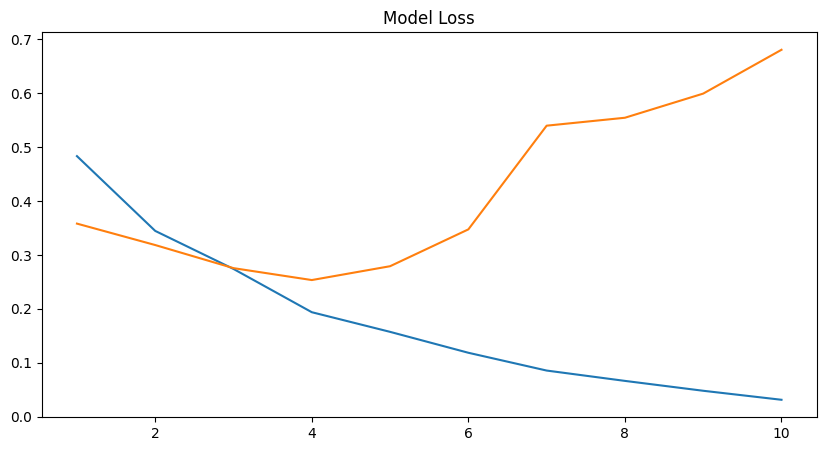

In [250]:
plt.figure(figsize = (10,5))
plt.plot(range(1,11), hist.history['loss'])
plt.plot(range(1,11), hist.history['val_loss'])
plt.title('Model Loss')
plt.show()

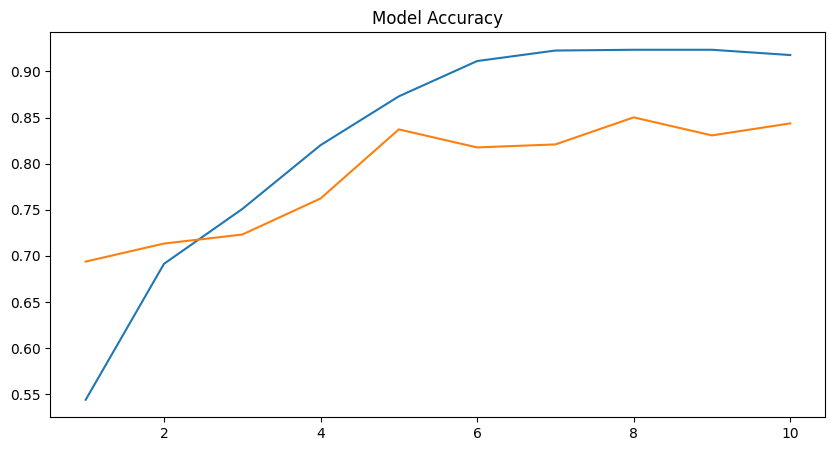

In [251]:
plt.figure(figsize = (10,5))
plt.plot(range(1,11), hist.history['accuracy'])
plt.plot(range(1,11), hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.show()

In [252]:
y_pred = model.predict(X_test)
y_pred_ = []
for i in y_pred:
    y_pred_.append([1 if j>0.5 else 0 for j in i])
y_pred_ = np.array(y_pred_)
y_pred_

12/12 [==============================] - 2s 193ms/step


array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       ...,
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [253]:
jaccard_score(y_test, y_pred_,average='samples')

0.7491319444444443

# 2. RNN

In [254]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [255]:
model = models.Sequential()
model.add(layers.Embedding(VOCAB_SIZE, 800, input_length=X_train.shape[1]))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.1))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.1))
model.add(layers.SimpleRNN(128, activation="relu", dropout=0.5,recurrent_dropout=0.3, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(y_train.shape[1], activation="sigmoid")) 
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 2587, 800)         22274400  
                                                                 
 conv1d_80 (Conv1D)          (None, 2585, 32)          76832     
                                                                 
 conv1d_81 (Conv1D)          (None, 2583, 32)          3104      
                                                                 
 conv1d_82 (Conv1D)          (None, 2581, 32)          3104      
                                                                 
 max_pooling1d_32 (MaxPooli  (None, 1290, 32)          0         
 ng1D)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 1290, 32)          0         
                                                     

In [256]:
checkpoint_filepath = 'weights/RNN.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [257]:
model.compile(optimizer = RMSprop(learning_rate=1e-3,epsilon=1e-9, weight_decay=0.4),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', jaccard])

In [258]:
hist = model.fit(X_train, y_train, 
                    validation_split=0.2,
                    epochs=10,
                    batch_size=16, 
                    verbose=1,
                    callbacks=[model_checkpoint_callback]
                    )

Epoch 1/10
77/77 [==============================] - 40s 506ms/step - loss: 0.5178 - accuracy: 0.5220 - jaccard: 0.3777 - val_loss: 0.3906 - val_accuracy: 0.6156 - val_jaccard: 0.3764
Epoch 2/10
77/77 [==============================] - 39s 507ms/step - loss: 0.3293 - accuracy: 0.7109 - jaccard: 0.5112 - val_loss: 0.3131 - val_accuracy: 0.6938 - val_jaccard: 0.5195
Epoch 3/10
77/77 [==============================] - 38s 500ms/step - loss: 0.2574 - accuracy: 0.7500 - jaccard: 0.6081 - val_loss: 0.2528 - val_accuracy: 0.7883 - val_jaccard: 0.6236
Epoch 4/10
77/77 [==============================] - 38s 497ms/step - loss: 0.1997 - accuracy: 0.8453 - jaccard: 0.6982 - val_loss: 0.2425 - val_accuracy: 0.8404 - val_jaccard: 0.6491
Epoch 5/10
77/77 [==============================] - 38s 499ms/step - loss: 0.1628 - accuracy: 0.8917 - jaccard: 0.7573 - val_loss: 0.2394 - val_accuracy: 0.8534 - val_jaccard: 0.6767
Epoch 6/10
77/77 [==============================] - 38s 496ms/step - loss: 0.1205 - a

In [259]:
model.load_weights(checkpoint_filepath)
train_result = pd.DataFrame(hist.history).dropna()

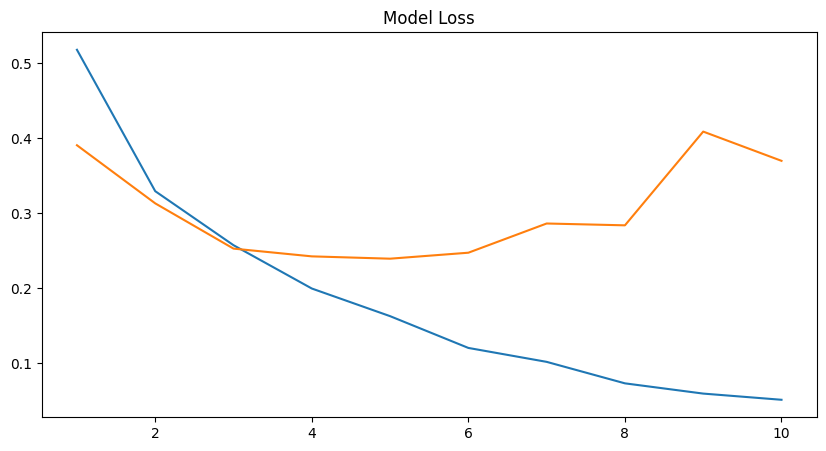

In [260]:
plt.figure(figsize = (10,5))
plt.plot(range(1,train_result.shape[0]+1), train_result['loss'])
plt.plot(range(1,train_result.shape[0]+1), train_result['val_loss'])
plt.title('Model Loss')
plt.show()

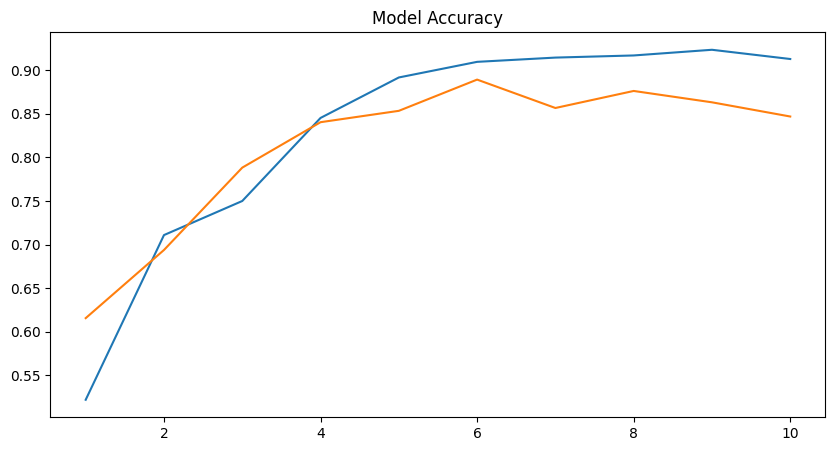

In [261]:
plt.figure(figsize = (10,5))
plt.plot(range(1,train_result.shape[0]+1), train_result['accuracy'])
plt.plot(range(1,train_result.shape[0]+1), train_result['val_accuracy'])
plt.title('Model Accuracy')
plt.show()

In [262]:
y_pred = model.predict(X_test)
y_pred_ = []
for i in y_pred:
    y_pred_.append([1 if j>0.5 else 0 for j in i])
y_pred_ = np.array(y_pred_)
y_pred_

12/12 [==============================] - 2s 142ms/step


array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [263]:
jaccard_score(y_test, y_pred_,average='samples')

0.7608506944444443

# 3. LSTM

In [264]:
model = models.Sequential()
model.add(layers.Embedding(VOCAB_SIZE, 800, input_length=X_train.shape[1]))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.1))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(128, activation="relu", dropout=0.5,recurrent_dropout=0.2, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(y_train.shape[1], activation="sigmoid")) 
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 2587, 800)         22274400  
                                                                 
 conv1d_85 (Conv1D)          (None, 2585, 32)          76832     
                                                                 
 conv1d_86 (Conv1D)          (None, 2583, 32)          3104      
                                                                 
 conv1d_87 (Conv1D)          (None, 2581, 32)          3104      
                                                                 
 max_pooling1d_34 (MaxPooli  (None, 1290, 32)          0         
 ng1D)                                                           
                                                                 
 dropout_34 (Dropout)        (None, 1290, 32)          0         
                                                     

In [265]:
checkpoint_filepath = 'weights/LSTM.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [266]:
model.compile(optimizer = RMSprop(learning_rate=1e-3,epsilon=1e-9, weight_decay=0.4),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', jaccard])

In [267]:
hist = model.fit(X_train, y_train, 
                    validation_split=0.2,
                    epochs=5,
                    batch_size=16, 
                    verbose=1,
                    callbacks=[model_checkpoint_callback]
                    )

Epoch 1/5
77/77 [==============================] - 112s 1s/step - loss: 0.4510 - accuracy: 0.5831 - jaccard: 0.3992 - val_loss: 0.3280 - val_accuracy: 0.6515 - val_jaccard: 0.4996
Epoch 2/5
77/77 [==============================] - 107s 1s/step - loss: 0.3274 - accuracy: 0.6971 - jaccard: 0.5158 - val_loss: 0.3396 - val_accuracy: 0.6580 - val_jaccard: 0.4798
Epoch 3/5
77/77 [==============================] - 112s 1s/step - loss: 0.2616 - accuracy: 0.7573 - jaccard: 0.5975 - val_loss: 0.2600 - val_accuracy: 0.7101 - val_jaccard: 0.6188
Epoch 4/5
77/77 [==============================] - 112s 1s/step - loss: 0.2258 - accuracy: 0.7907 - jaccard: 0.6583 - val_loss: 0.3168 - val_accuracy: 0.7101 - val_jaccard: 0.5371
Epoch 5/5
77/77 [==============================] - 112s 1s/step - loss: 0.1960 - accuracy: 0.8575 - jaccard: 0.6958 - val_loss: 0.2474 - val_accuracy: 0.8339 - val_jaccard: 0.6443


In [268]:
model.load_weights(checkpoint_filepath)

In [269]:
train_result = pd.DataFrame(hist.history).dropna()

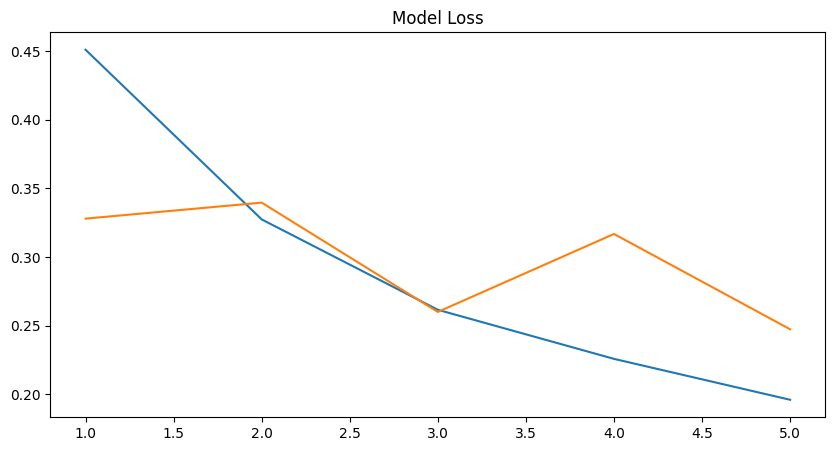

In [270]:
plt.figure(figsize = (10,5))
plt.plot(range(1,train_result.shape[0]+1), train_result['loss'])
plt.plot(range(1,train_result.shape[0]+1), train_result['val_loss'])
plt.title('Model Loss')
plt.show()

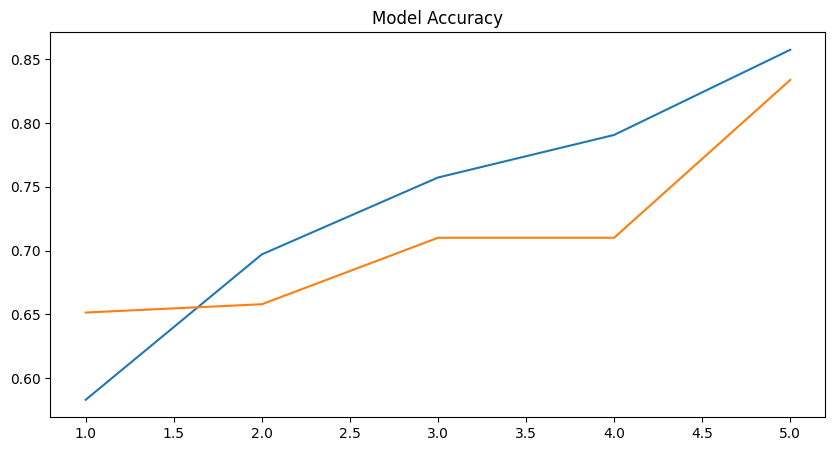

In [271]:
plt.figure(figsize = (10,5))
plt.plot(range(1,train_result.shape[0]+1), train_result['accuracy'])
plt.plot(range(1,train_result.shape[0]+1), train_result['val_accuracy'])
plt.title('Model Accuracy')
plt.show()

In [272]:
y_pred = model.predict(X_test)
y_pred_ = []
for i in y_pred:
    y_pred_.append([1 if j>=0.5 else 0 for j in i])
y_pred_ = np.array(y_pred_)
y_pred_

12/12 [==============================] - 3s 206ms/step


array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       ...,
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [273]:
jaccard_score(y_test, y_pred_,average='samples')

0.747829861111111